In [1]:
from inda_mir.modeling.models import *
from inda_mir.modeling.evaluation import *
from inda_mir.loaders import load_data_partition

In [16]:
data_partition = 'our_extractor_random_split_with_brass.data'

In [17]:
data = load_data_partition(data_partition)

In [18]:
data.get_features_names()

Index(['average_loudness', 'barkbands_median_0', 'barkbands_median_1',
       'barkbands_median_10', 'barkbands_median_11', 'barkbands_median_12',
       'barkbands_median_13', 'barkbands_median_14', 'barkbands_median_15',
       'barkbands_median_16',
       ...
       'spectral_contrast_valleys_median_5',
       'spectral_contrast_valleys_stdev_0',
       'spectral_contrast_valleys_stdev_1',
       'spectral_contrast_valleys_stdev_2',
       'spectral_contrast_valleys_stdev_3',
       'spectral_contrast_valleys_stdev_4',
       'spectral_contrast_valleys_stdev_5', 'spectral_rms_dvar',
       'zerocrossingrate_max', 'zerocrossingrate_median'],
      dtype='object', length=253)

In [19]:
X_train, y_train = data.get_numpy_train_data()
X_test, y_test = data.get_numpy_test_data()

# LightGBM - All extracted subset

In [20]:
lgbm = LightGBMClassifier()
lgbm.fit(X_train, y_train)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 64515
[LightGBM] [Info] Number of data points in the train set: 6671, number of used features: 253
[LightGBM] [Info] Start training from score -1.612591
[LightGBM] [Info] Start training from score -3.237181
[LightGBM] [Info] Start training from score -1.531045
[LightGBM] [Info] Start training from score -1.512507
[LightGBM] [Info] Start training from score -1.656393
[LightGBM] [Info] Start training from score -2.010938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

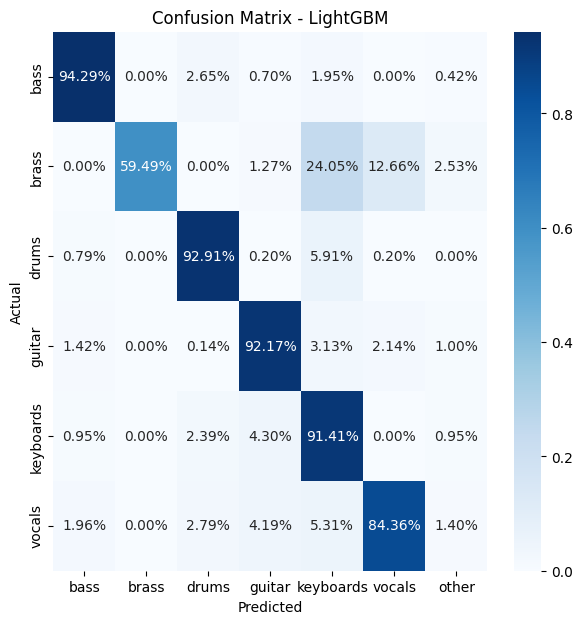

In [21]:
plot_confusion_matrix(y_test, X_test, lgbm)

In [22]:
print_classification_report(y_test, lgbm.predict(X_test), data.labels)

              precision    recall  f1-score   support

        bass       0.96      0.94      0.95       718
       brass       1.00      0.59      0.75        79
       drums       0.92      0.93      0.93       508
      guitar       0.94      0.92      0.93       702
   keyboards       0.79      0.91      0.85       419
      vocals       0.92      0.84      0.88       358

   micro avg       0.91      0.91      0.91      2784
   macro avg       0.92      0.86      0.88      2784
weighted avg       0.92      0.91      0.91      2784



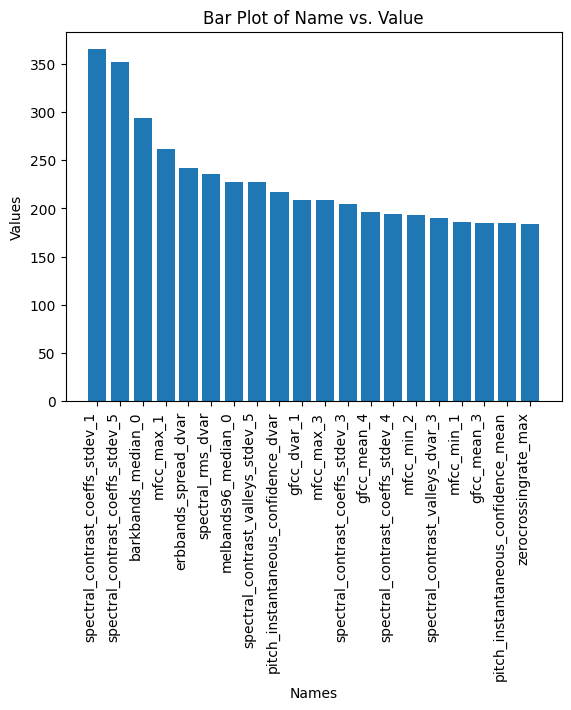

In [23]:
plot_feature_importance(lgbm.get_feature_importance(data.get_features_names()))

In [12]:
lgbm.save_model('../models/', 'lgbm_oe_rs_wbrass_27102023')

# LightGBM - Only top-30

In [48]:
subset = [('spectral_contrast_coeffs_stdev_1', 130),
 ('melbands96_median_0', 90),
 ('gfcc_mean_1', 80),
 ('spectral_centroid_mean', 79),
#  ('spectral_contrast_valleys_dvar2_5', 73),
 ('mfcc_stdev_6', 65),
 ('mfcc_min_6', 63),
#  ('spectral_rms_dvar2', 63),
 ('melbands96_median_90', 61),
 ('mfcc_stdev_4', 58),
 ('spectral_contrast_valleys_stdev_5', 57),
 ('zerocrossingrate_max', 57),
 ('average_loudness', 56),
 ('mfcc_max_3', 54),
 ('zerocrossingrate_median', 54),
 ('spectral_contrast_coeffs_mean_2', 51),
 ('mfcc_mean_3', 50),
 ('pitch_instantaneous_confidence_mean', 49),
 ('erbbands_spread_dvar', 46),
 ('loudness_ebu128_short_term_min', 46),
#  ('melbands_flatness_db_min', 45),
 ('barkbands_median_0', 44),
 ('pitch_instantaneous_confidence_dvar', 43),
#  ('erbbands_spread_dvar2', 41),
 ('melbands96_median_31', 41),
 ('mfcc_max_2', 41),
#  ('gfcc_dvar2_0', 40),
 ('gfcc_mean_7', 40),
 ('mfcc_median_7', 40),
 ('spectral_contrast_valleys_median_4', 40)]

subset = [f[0] for f in subset] + ['filename', 'frame', 'track_id']

In [49]:
data.X_train = data.X_train[subset]
data.X_test = data.X_test[subset]

In [50]:
X_train, y_train = data.get_numpy_train_data()
X_test, y_test = data.get_numpy_test_data()

In [51]:
lgbm = LightGBMClassifier()
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 6671, number of used features: 25
[LightGBM] [Info] Start training from score -1.612591
[LightGBM] [Info] Start training from score -3.237181
[LightGBM] [Info] Start training from score -1.531045
[LightGBM] [Info] Start training from score -1.512507
[LightGBM] [Info] Start training from score -1.656393
[LightGBM] [Info] Start training from score -2.010938


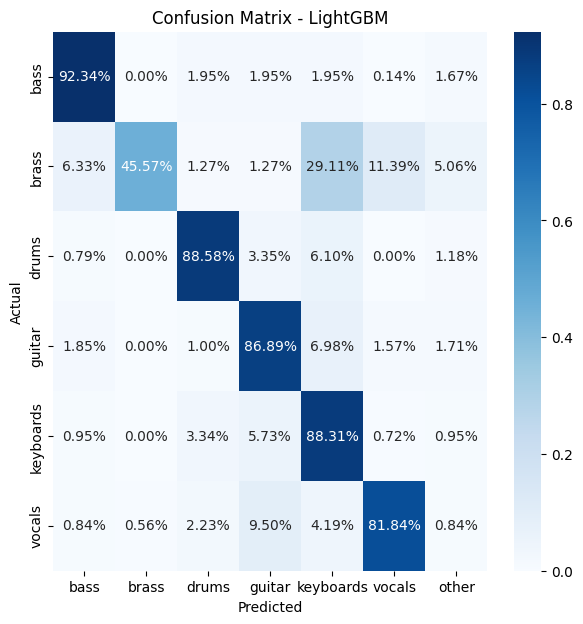

In [52]:
plot_confusion_matrix(y_test, X_test, lgbm)

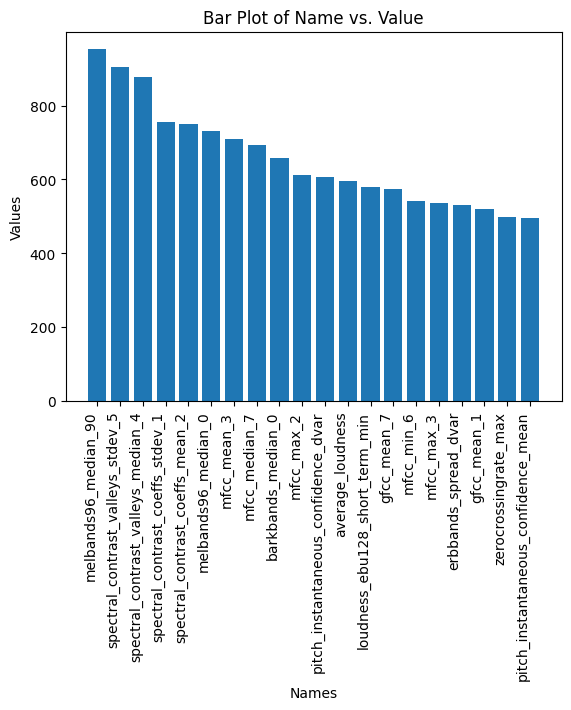

In [18]:
plot_feature_importance(lgbm.get_feature_importance(data.get_features_names()))